In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Shark Attack/GSAF5 - Sheet1-GSAF.csv")
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Change format of column names for easier manipulation
df.columns = [col.strip().replace(" ","_").lower() for col in df.columns]
# Remove columns that are not relevant to the data or may be errors in importing from original file
df.drop(['pdf', 'href_formula', 'href', 'case_number', 'case_number.1','original_order', 'unnamed:_21', 'unnamed:_22'], axis=1, inplace = True)
# Remove columns that are not relevant to hypothesis
df.drop(["name","sex","age","time","species","source","date"], axis=1, inplace = True)
# Remove rows with null values
df.dropna(how="all", inplace=True)
# Name the unnamed column
df.rename(columns= {"unnamed:_11":"fatal"}, inplace = True)
# Change format of cells names for easier manipulation and "elimination" of duplicates
df=df.applymap(lambda x: x.strip().replace(" ","_").replace(",","").replace("-","_").lower() if isinstance(x, str) else x)


In [ ]:
# Code to replace null values to 0, transform the values of year to an integer and remove rows before 1980
df["year"] = df["year"].fillna(0)
# Transform the values of year to an integer
df = df.astype({"year":"int"})
# Remove rows before the year 1980
df = df[df["year"]>=1980]

In [ ]:
# df.tail()

In [ ]:
# Code to replace duplicated mispealed countries:
# PT
df["country"].replace("azores","portugal", inplace = True)
# Ocean/Sea
df["country"].replace(["atlantic_ocean","caribbean_sea","gulf_of_aden", "north_atlantic_ocean", "northern_arabian_sea","egypt_/_israel","coral_sea"],"ocean&sea", inplace= True)
# UK
df["country"].replace(["british_overseas_territory","british_virgin_islands","cayman_islands","diego_garcia","england","grand_cayman","scotland","st_helena_british_overseas_territory","turks_&_caicos","turks_and_caicos"],"united_kingdom", inplace = True)
# Columbia
df["country"].replace("columbia","colombia", inplace = True)
# USA
df["country"].replace(["guam","puerto_rico"],"usa", inplace= True)
# St. Kitts and Nevis
df["country"].replace("nevis","st_kitts_/_nevis", inplace= True)
# FR
df["country"].replace(["new_caledonia","reunion_island", "st._maartin", "st_martin","st._martin"],"france", inplace= True)
# JP
df["country"].replace("okinawa","japan", inplace= True)
# Trinidad_&_Tobago
df["country"].replace("trinidad","trinidad_&_tobago", inplace= True)
# UAE
df["country"].replace("united_arab_emirates_(uae)","united_arab_emirates", inplace= True)
# View list of countries
df["country"].sort_values().unique()

array(['angola', 'antigua', 'argentina', 'aruba', 'australia', 'bahamas',
       'belize', 'bermuda', 'brazil', 'canada', 'cape_verde', 'chile',
       'china', 'colombia', 'comoros', 'costa_rica', 'croatia', 'cuba',
       'dominican_republic', 'ecuador', 'egypt', 'el_salvador', 'fiji',
       'france', 'french_polynesia', 'greece', 'honduras', 'hong_kong',
       'india', 'indonesia', 'iran', 'ireland', 'israel', 'italy',
       'jamaica', 'japan', 'jordan', 'kenya', 'kiribati', 'liberia',
       'libya', 'madagascar', 'malaysia', 'maldives', 'malta',
       'marshall_islands', 'mauritius', 'mexico', 'micronesia',
       'montenegro', 'mozambique', 'namibia', 'new_zealand', 'nigeria',
       'norway', 'ocean&sea', 'palestinian_territories', 'panama',
       'papua_new_guinea', 'philippines', 'portugal', 'reunion', 'russia',
       'samoa', 'saudi_arabia', 'senegal', 'seychelles', 'sierra_leone',
       'solomon_islands', 'somalia', 'south_africa', 'south_korea',
       'spain', 'sri_

In [ ]:
# REMOVE INDEX 673 (NaN on: country, state, location)
df.drop(673, inplace = True)

# FILLNA OF THE 2 NaN (1139 and 3575) - based on state/activity
df["country"].fillna("ocean&sea",inplace = True)

<ipython-input-9-22c15cc1080e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_5["country"][0]=df_top_5["country"][0].upper()
<ipython-input-9-22c15cc1080e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_top_5["country"], y =df_top_5["count"],palette=sns.color_palette()).set(xlabel='Country', ylabel='Number of attacks after 1980',title='THE 5 COUNTRIES WITH THE HIGHEST SHARK ATTACKS')
<ipython-input-9-22c15cc1080e>:7: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(x=df_top_5["country"], y =df_top_5["count"],palette=sns.color_palette()).set(xlabel='Country', ylabel='Number of att

[Text(0.5, 0, 'Country'),
 Text(0, 0.5, 'Number of attacks after 1980'),
 Text(0.5, 1.0, 'THE 5 COUNTRIES WITH THE HIGHEST SHARK ATTACKS')]

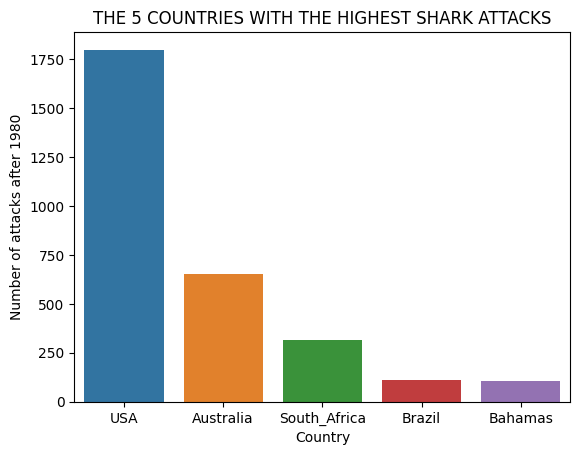

In [ ]:
# PLOTING THE 5 COUNTRIES WITH THE HIGHEST RECORDED SHARK ATTACKS
df_top_5 = df["country"].value_counts()[0:5].to_frame().reset_index()
# The codes below just format the labels
df_top_5=df_top_5.applymap(lambda x: x.title() if isinstance(x, str) else x)
df_top_5["country"][0]=df_top_5["country"][0].upper()
# PLOT
sns.barplot(x=df_top_5["country"], y =df_top_5["count"],palette=sns.color_palette()).set(xlabel='Country', ylabel='Number of attacks after 1980',title='THE 5 COUNTRIES WITH THE HIGHEST SHARK ATTACKS')

In [ ]:
# designate dataframe for USA figues
df_usa = df[df["country"] == "usa"]

In [ ]:
# data cleanup of states relevant to USA
df_usa["state"].replace(["carolina_coast","north_&_south_carolina","noirth_carolina"], "north_carolina", inplace=True)
df_usa["state"].replace(["midway_atoll","wake_island","johnston_atoll"], "military_zone", inplace=True)
df_usa["state"].replace(["maui","wake_island","palmyra_atoll"], "hawaii", inplace=True)
df_usa["state"].replace("franklin_county_florida", "florida", inplace=True)
df_usa["state"].replace("us_virgin_islands", "usa_virgin_islands", inplace=True)
df_usa["state"].replace("cayman_islands", "usa_cayman_islands", inplace=True)
df_usa["state"].replace("samoa", "usa_samoa", inplace=True)
df_usa["state"].sort_values().unique()

<ipython-input-11-2b465be57b38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa["state"].replace(["carolina_coast","north_&_south_carolina","noirth_carolina"], "north_carolina", inplace=True)
<ipython-input-11-2b465be57b38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa["state"].replace(["midway_atoll","wake_island","johnston_atoll"], "military_zone", inplace=True)
<ipython-input-11-2b465be57b38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

array(['alabama', 'alaska', 'bahamas', 'california', 'delaware',
       'florida', 'georgia', 'guam', 'hawaii', 'kentucky', 'louisiana',
       'maine', 'maryland', 'massachusetts', 'merizo', 'military_zone',
       'mississippi', 'missouri', 'new_jersey', 'new_mexico', 'new_york',
       'north_carolina', 'north_region', 'oregon', 'puerto_rico',
       'rhode_island', 'south_carolina', 'texas', 'usa_cayman_islands',
       'usa_samoa', 'usa_virgin_islands', 'virgin_islands', 'virginia',
       'washington', nan], dtype=object)

In [ ]:
# substitute null values for NA as in not available, not to lose other data
df_usa["location"].fillna("na", inplace=True)
df_usa["state"].fillna("na", inplace=True)
df_usa["activity"].fillna("na", inplace=True)
df_usa["fatal"].fillna("na", inplace=True)
df_usa["injury"].fillna("na", inplace=True)
df_usa["type"].fillna("invalid", inplace=True)

<ipython-input-12-57870b9cd004>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa["location"].fillna("na", inplace=True)
<ipython-input-12-57870b9cd004>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa["state"].fillna("na", inplace=True)
<ipython-input-12-57870b9cd004>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa["activity"].fillna("na", inplace=True)
<ipython-input-12-57870b9cd004>:5: SettingWithCopyWarning: 
A

In [ ]:
# Standardize values in location related to the state of Florida for a deeper analysis.
florida_counties = "Alachua,Baker,Bay,Bradford,Brevard,Broward,Calhoun,Charlotte,Citrus,Clay,Collier,Columbia,DeSoto,Dixie,Duval,Escambia,Flagler,Franklin,Gadsden,Gilchrist,Glades,Gulf,Hamilton,Hardee,Hendry,Hernando,Highlands,Hillsborough,Holmes,Indian_River,Jackson,Jefferson,Lafayette,Lake,Lee,Leon,Levy,Liberty,Madison,Manatee,Marion,Martin,Miami_Dade,Monroe,Nassau,Okaloosa,Okeechobee,Orange,Osceola,Palm_Beach,Pasco,Pinellas,Polk,Putnam,Santa_Rosa,Sarasota,Seminole,St._Johns,St._Lucie,Sumter,Suwannee,Taylor,Union,Volusia,Wakulla,Walton,Washington"
florida_counties = florida_counties.lower().split(",")
for name in florida_counties:
    df_usa.loc[df_usa["location"].str.contains(name), "location"] = f"{name}_county"
    df_usa.loc[df_usa["location"].str.contains("john"), "location"] = "st._johns_county"
df_usa.loc[df_usa["location"].str.contains("lucie"), "location"] = "st._lucie_county"
df_usa.loc[df_usa["location"].str.contains("miami"), "location"] = "miami_dade_county"
df_usa.loc[df_usa["location"].str.contains("dade"), "location"] = "miami_dade_county"
df_usa.loc[df_usa["location"].str.contains("panama"), "location"] = "bay_county"
df_usa.loc[df_usa["location"].str.contains("mayport"), "location"] = "duval_county"
df_usa.loc[df_usa["location"].str.contains("largo"), "location"] = "monroe_county"
df_usa.loc[df_usa["location"].str.contains("pensacola"), "location"] = "escambia_county"
df_usa.loc[df_usa["location"].str.contains("naples"), "location"] = "collier_county"
df_usa.loc[df_usa["location"].str.contains("canaveral"), "location"] = "brevard_county"
df_usa.loc[df_usa["location"].str.contains("fort_worth"), "location"] = "palm_beach_county"
df_usa.loc[df_usa["location"].str.contains("florida_keys"), "location"] = "monroe_county"
df_usa.loc[df_usa["location"].str.contains("biscayne"), "location"] = "miami_dade_county"
df_usa.loc[df_usa["location"].str.contains("bathtub"), "location"] = "martin_county"
df_usa.loc[df_usa["location"].str.contains("jupiter"), "location"] = "palm_beach_county"
df_usa.loc[df_usa["location"].str.contains("augustine"), "location"] = "st._johns_county"
df_usa.loc[df_usa["location"].str.contains("jensen"), "location"] = "martin_county"
df_usa.loc[df_usa["location"].str.contains("daytona"), "location"] = "volusia_county"
df_usa.loc[df_usa["location"].str.contains("lauderdale"), "location"] = "broward_county"
df_usa.loc[df_usa["location"].str.contains("marco"), "location"] = "collier_county"
df_usa.loc[df_usa["location"].str.contains("delray"), "location"] = "palm_beach_county"
df_usa.loc[df_usa["location"].str.contains("macarthur"), "location"] = "palm_beach_county"
df_usa.loc[df_usa["location"].str.contains("key_west"), "location"] = "monroe_county"
df_usa.loc[df_usa["location"].str.contains("tarpon"), "location"] = "pinellas_county"
df_usa.loc[df_usa["location"].str.contains("elliot"), "location"] = "miami_dade_county"
df_usa.loc[df_usa["location"].str.contains("petersburg"), "location"] = "pinellas_county"
df_usa.loc[df_usa["location"].str.contains("bethune"), "location"] = "kershaw_county"
df_usa.loc[df_usa["location"].str.contains("hutchinson"), "location"] = "indian_river_county"
df_usa.loc[df_usa["location"].str.contains("huguenot"), "location"] = "duval_county"
df_usa.loc[df_usa["location"].str.contains("marques"), "location"] = "monroe_county"
df_usa.loc[df_usa["location"].str.contains("myers"), "location"] = "lee_county"
df_usa.loc[df_usa["location"].str.contains("sebastian"), "location"] = "brevard_county"
df_usa.loc[df_usa["location"].str.contains("pierce"), "location"] = "st._lucie_county"
df_usa.loc[df_usa["location"].str.contains("florida_straits"), "location"] = "monroe_county"
df_usa.loc[df_usa["location"].str.contains("crystal_river"), "location"] = "citrus_county"
df_usa.loc[df_usa["location"].str.contains("carter_cay"), "location"] = "na"
df_usa.loc[df_usa["location"].str.contains("hobe_sound"), "location"] = "martin_county"
df_usa.loc[df_usa["location"].str.contains("smyrna"), "location"] = "volusia_county"
df_usa.loc[df_usa["location"].str.contains("ormond"), "location"] = "volusia_county"
df_usa.loc[df_usa["location"].str.contains("keaton_beach"), "location"] = "taylor_county"
df_usa.loc[df_usa["location"].str.contains("st_george_island"), "location"] = "franklin_county"

In [ ]:
# data cleaning for fatal column
df_usa["fatal"].replace("n","no", inplace = True) # data cleaning
df_usa["fatal"].replace("y","yes", inplace = True) # data cleaning
df_usa["fatal"].replace("m","no", inplace = True) # input error
df_usa["fatal"].replace("f","yes", inplace = True) # f for fatal
df_usa["fatal"].replace("y_x_2","yes", inplace = True) # indicated 2 people died
df_usa["fatal"].replace("nq","no", inplace = True) # input error

<ipython-input-14-9010e0f0a6bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa["fatal"].replace("n","no", inplace = True) # data cleaning
<ipython-input-14-9010e0f0a6bd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa["fatal"].replace("y","yes", inplace = True) # data cleaning
<ipython-input-14-9010e0f0a6bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa["fatal"].replace("m","no", inplace = True) # input error

In [ ]:
df_usa.loc[df_usa["activity"].str.contains("fish"), "activity"] = "fishing"
df_usa.loc[df_usa["activity"].str.contains("net"), "activity"] = "fishing"
df_usa.loc[df_usa["activity"].str.contains("shrimp"), "activity"] = "fishing"
df_usa.loc[df_usa["activity"].str.contains("lobster"), "activity"] = "fishing"
df_usa.loc[df_usa["activity"].str.contains("spear"), "activity"] = "fishing"
df_usa.loc[df_usa["activity"].str.contains("scallo"), "activity"] = "fishing"
df_usa.loc[df_usa["activity"].str.contains("pick"), "activity"] = "fishing"
df_usa.loc[df_usa["activity"].str.contains("surf"), "activity"] = "surfing"
df_usa.loc[df_usa["activity"].str.contains("board"), "activity"] = "surfing"
df_usa.loc[df_usa["activity"].str.contains("kite"), "activity"] = "surfing"
df_usa.loc[df_usa["activity"].str.contains("sup"), "activity"] = "surfing"
df_usa.loc[df_usa["activity"].str.contains("padd"), "activity"] = "surfing"
df_usa.loc[df_usa["activity"].str.contains("dive"), "activity"] = "diving"
df_usa.loc[df_usa["activity"].str.contains("divi"), "activity"] = "diving"
df_usa.loc[df_usa["activity"].str.contains("swim"), "activity"] = "swimming"
df_usa.loc[df_usa["activity"].str.contains("sitting"), "activity"] = "swimming"
df_usa.loc[df_usa["activity"].str.contains("water"), "activity"] = "swimming"
df_usa.loc[df_usa["activity"].str.contains("float"), "activity"] = "swimming"
df_usa.loc[df_usa["activity"].str.contains("wad"), "activity"] = "swimming"
df_usa.loc[df_usa["activity"].str.contains("crawl"), "activity"] = "swimming"
df_usa.loc[df_usa["activity"].str.contains("jump"), "activity"] = "swimming"
df_usa.loc[df_usa["activity"].str.contains("play"), "activity"] = "swimming"
df_usa.loc[df_usa["activity"].str.contains("hold"), "activity"] = "swimming"
df_usa.loc[df_usa["activity"].str.contains("ski"), "activity"] = "water vehicle"
df_usa.loc[df_usa["activity"].str.contains("boat"), "activity"] = "water vehicle"
df_usa.loc[df_usa["activity"].str.contains("sail"), "activity"] = "water vehicle"
df_usa.loc[df_usa["activity"].str.contains("cruis"), "activity"] = "water vehicle"
df_usa.loc[df_usa["activity"].str.contains("anchor"), "activity"] = "water vehicle"
df_usa.loc[df_usa["activity"].str.contains("capsiz"), "activity"] = "water vehicle"
df_usa.loc[df_usa["activity"].str.contains("adrift"), "activity"] = "water vehicle"
df_usa.loc[df_usa["activity"].str.contains("ship"), "activity"] = "water vehicle"
df_usa.loc[df_usa["activity"].str.contains("raft"), "activity"] = "water vehicle"
df_usa.loc[df_usa["activity"].str.contains("kaya"), "activity"] = "water vehicle"
df_usa.loc[df_usa["activity"].str.contains("canoe"), "activity"] = "water vehicle"
df_usa.loc[df_usa["activity"].str.contains("stand"), "activity"] = "others"
df_usa.loc[df_usa["activity"].str.contains("snork"), "activity"] = "snorkeling"
df_usa.loc[df_usa["activity"].str.contains("walk"), "activity"] = "others"
df_usa.loc[df_usa["activity"].str.contains("shark"), "activity"] = "others"
df_usa.loc[df_usa["activity"].str.contains("illegal"), "activity"] = "others"
df_usa.loc[df_usa["activity"].str.contains("disaster"), "activity"] = "others"
df_usa.loc[df_usa["activity"].str.contains("research"), "activity"] = "others"
df_usa.loc[df_usa["activity"].str.contains("film"), "activity"] = "others"
df_usa.loc[df_usa["activity"].str.contains("aquarium"), "activity"] = "others"
df_usa.loc[df_usa["activity"].str.contains("life"), "activity"] = "others"
df_usa.loc[df_usa["activity"].str.contains("photo"), "activity"] = "others"

In [ ]:
# changing some values into titles for better display in charts
df_usa=df_usa.applymap(lambda x: x.strip().replace("_"," ").title() if isinstance(x, str) else x)
df_usa.loc[df_usa["country"].str.contains("Usa"), "country"] = "USA"
df_usa.loc[df_usa["state"].str.contains("Usa"), "state"] = "USA"

In [ ]:
df_usa

,year,type,country,state,location,activity,injury,fatal
1,2024,Unprovoked,USA,Hawaii,Old Man'S Waikiki,Surfing,No Injury Shark Bit Surfboard,No
2,2024,Unprovoked,USA,Hawaii,Rainbows Oahu,Swimming,Lacerations To Left Foot,No
10,2023,Unprovoked,USA,Hawaii,Baby Beach Maui,Surfing,Fatal,Yes
24,2023,Unprovoked,USA,Florida,Palm Beach County,Swimming,Lacerations To Right Forearm,No
29,2023,Unprovoked,USA,Hawaii,Pua’Ena Point Haleiwa Oahu,Surfing,Bite To Right Thigh,No
...,...,...,...,...,...,...,...,...
3682,1980,Unprovoked,USA,New Jersey,Ocean City Cape May County,Surfing,Back Bitten,No
3683,1980,Unprovoked,USA,Delaware,Dewey Beach,Others,No Injury Shark Bit Her Bathing Suit,No
3684,1980,Unprovoked,USA,North Carolina,Emerald Isle Pier (Near Morehead City) Cartere...,Surfing,No Injury Bumped Off Board,No
3685,1980,Unprovoked,USA,Florida,Volusia County,Surfing,Lower Leg Bitten,No


In [ ]:
# dataframes showcasing fatality in by state
fatalno_bystate = df_usa[df_usa["fatal"] == "No"].groupby(["state"]).agg({"fatal": "count"})
fatalno_bystate.drop("Na", inplace=True)
fatalyes_bystate = df_usa[df_usa["fatal"] == "Yes"].groupby(["state"]).agg({"fatal": "count"})
fatalyes_bystate.drop("Na", inplace=True)
fatalyes_bystate = fatalyes_bystate.sort_values("fatal", ascending=False)
fatalno_bystate = fatalno_bystate.sort_values("fatal", ascending=False)
fatal_bystate = pd.merge(fatalno_bystate,fatalyes_bystate, on="state", how="outer")

In [ ]:
pivot_df

NameError: name 'pivot_df' is not defined

<Axes: xlabel='Year', ylabel='Cases'>

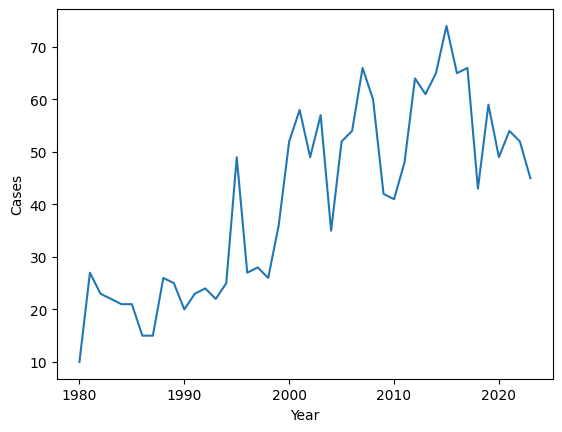

In [ ]:
pivot_df = df_usa.pivot_table(index="year", columns="country", values=["type"], aggfunc="count")
pivot_df.drop(2024, inplace=True)
pivot_df.plot(legend=None,xlabel="Year", ylabel="Cases", scalex=True )

Text(0.5, 1.0, 'Shark Attack Deaths by State')

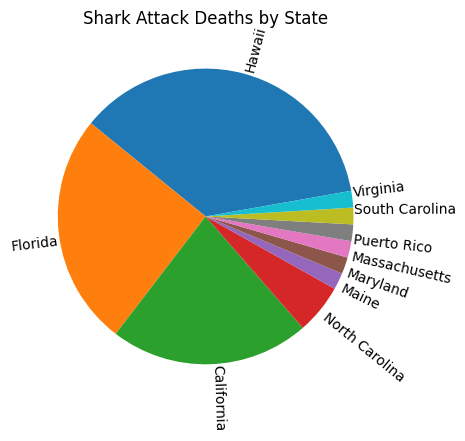

In [ ]:
fatalyes_bystate.plot.pie(subplots=True, legend=None, labeldistance=1,radius=1,wedgeprops = {'linewidth': 3}, xlabel="", rotatelabels=True, ylabel="" ,startangle=10)
plt.title('Shark Attack Deaths by State')

Text(0.5, 1.0, 'Mortality Rate of Shark Attacks within State')

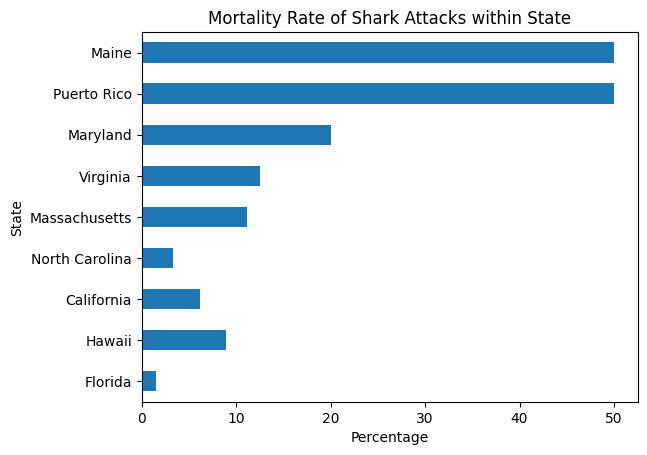

In [ ]:
fatalper_withinstate = fatal_bystate.copy()
fatalper_withinstate["Not Fatal"] = ((fatalper_withinstate['fatal_x'] / (fatalper_withinstate['fatal_x']+fatalper_withinstate['fatal_y'])) * 100)
fatalper_withinstate["Fatal"] = ((fatalper_withinstate['fatal_y'] / (fatalper_withinstate['fatal_x']+fatalper_withinstate['fatal_y'])) * 100)
fatalper_withinstate.drop(columns = ["fatal_y", "fatal_x"], inplace=True)
fatalper_withinstate["Not Fatal"].fillna(100.0, inplace=True)
fatalper_withinstate["Fatal"].fillna(0.0, inplace=True)
fatalper_withinstate = round(fatalper_withinstate,2)
fatalper_withinstate.sort_values("Fatal", ascending=False)
fatalper_withinstate["Fatal"][fatalper_withinstate["Fatal"]> 1].plot(kind="barh", xlabel="Percentage", ylabel="State")
plt.title('Mortality Rate of Shark Attacks within State')

Text(0.5, 1.0, 'Shark Attack Cases by Activity')

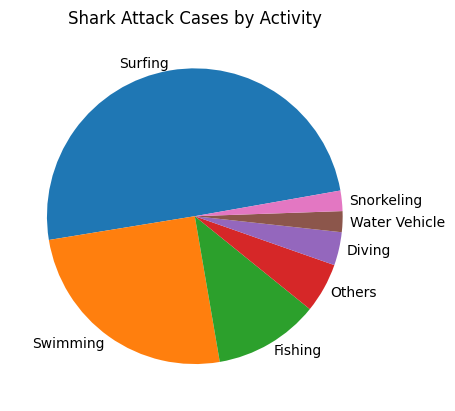

In [ ]:
cases_byactivity = df_usa.groupby(["activity"]).agg({"fatal": "count"}).sort_values('fatal', ascending= False)
cases_byactivity.drop("Na", inplace=True)
cases_byactivity.plot.pie(subplots=True, legend=None, labeldistance=1.05,radius=1,wedgeprops = {'linewidth': 3}, xlabel="", ylabel="" ,startangle=10)
plt.title('Shark Attack Cases by Activity')

Text(0.5, 1.0, 'Shark Attack Deaths by Activity')

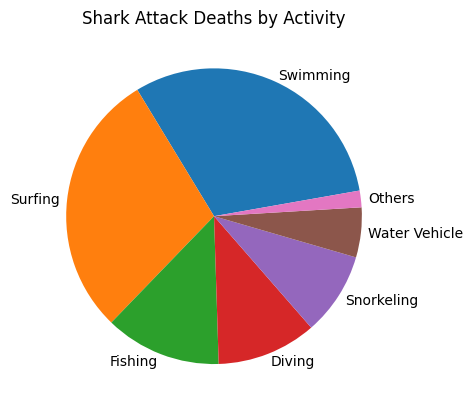

In [ ]:
fatalyes_byactivity = df_usa[df_usa["fatal"] == "Yes"].groupby(["activity"]).agg({"fatal": "count"}).sort_values('fatal', ascending= False)
fatalyes_byactivity.drop("Na", inplace=True)
fatalyes_byactivity.plot.pie(subplots=True, legend=None, labeldistance=1.05,radius=1,wedgeprops = {'linewidth': 3}, xlabel="", ylabel="" ,startangle=10)
plt.title('Shark Attack Deaths by Activity')

Text(0.5, 1.0, 'Shark Attack Cases by State')

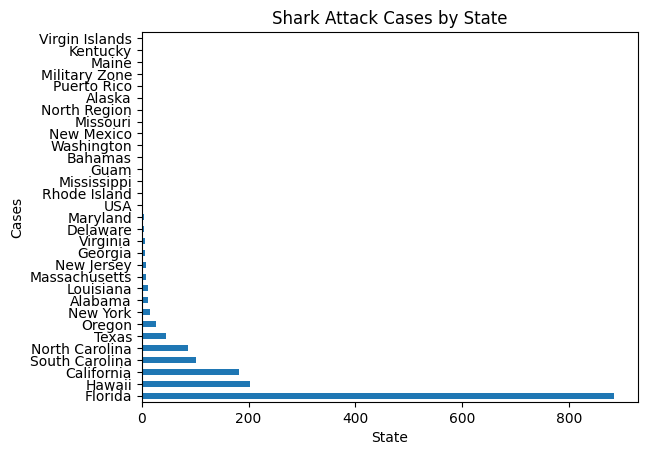

In [ ]:
fatalno_bystate = fatalno_bystate.sort_values("fatal", ascending=False)
fatalno_bystate.plot(kind="barh", legend=None, xlabel="State", ylabel="Cases")
plt.title('Shark Attack Cases by State')

In [ ]:
df_usa[df_usa["fatal"] == "yes"].groupby(["state"]).agg({"fatal": "count"})

,fatal
state,


In [ ]:
df_usa[df_usa["fatal"] == "yes"].groupby(["activity"]).agg({"fatal": "count"})

,fatal
activity,


In [ ]:
pivot_df = df_usa.pivot_table(index="state", columns="fatal", values=["year"], aggfunc="count")
pivot_df

year                     
fatal             Na     No Unknown   Yes
state                                    
Alabama          NaN   12.0     NaN   NaN
Alaska           NaN    1.0     NaN   NaN
Bahamas          NaN    2.0     NaN   NaN
California      16.0  183.0     NaN  12.0
Delaware         NaN    4.0     NaN   NaN
Florida         37.0  884.0     4.0  14.0
Georgia          NaN    7.0     NaN   NaN
Guam             NaN    2.0     NaN   NaN
Hawaii          16.0  203.0     4.0  20.0
Kentucky         NaN    1.0     NaN   NaN
Louisiana        NaN   11.0     NaN   NaN
Maine            NaN    1.0     NaN   1.0
Maryland         NaN    4.0     NaN   1.0
Massachusetts    NaN    8.0     NaN   1.0
Merizo           1.0    NaN     NaN   NaN
Military Zone    NaN    1.0     NaN   NaN
Mississippi      NaN    2.0     NaN   NaN
Missouri         NaN    1.0     NaN   NaN
Na               NaN    2.0     NaN   2.0
New Jersey       1.0    8.0     NaN   NaN
New Mexico       NaN    1.0     NaN   NaN
New York         2.0   16.0     NaN   NaN
North Carolina  10.0   86.0     NaN   3.0
North Region     NaN    1.0     NaN   NaN
Oregon           NaN   27.0     NaN   NaN
Puerto Rico      1.0    1.0     NaN   1.0
Rhode Island     NaN    2.0     NaN   NaN
South Carolina  12.0  102.0     2.0   1.0
Texas            2.0   46.0     NaN   NaN
USA              NaN    3.0     NaN   NaN
Virgin Islands   NaN    1.0     NaN   NaN
Virginia         1.0    7.0     NaN   1.0
Washington       NaN    2.0     NaN   NaN

In [ ]:
extra_flor=df_usa[df_usa["state"] == "Florida"].groupby(["location"]).agg({"fatal": "count"}).sort_values('fatal', ascending = False)
extra_flor

,fatal
location,
Volusia County,329
Brevard County,122
Palm Beach County,84
Monroe County,54
Martin County,38
Duval County,37
St. Johns County,36
St. Lucie County,35
Miami Dade County,24
